In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carprices/CarPrice_Assignment.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
car_price=pd.read_csv("/kaggle/input/carprices/CarPrice_Assignment.csv")
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
car_price['fueltype'].replace({'gas':2,'diesel':1},inplace=True)
car_price['doornumber'].replace({'two':2,'four':4},inplace=True)
car_price['enginelocation'].replace({'front':1000,'rear':2000},inplace=True)
print(car_price['carbody'].unique())
car_price['carbody'].replace({'convertible':8,'hatchback':3,'sedan':3,'wagon':5,'hardtop':6},inplace=True)
print(car_price['fuelsystem'].unique())
car_price['fuelsystem'].replace({'mpfi':1,'idi':2,'2bbl':3,'mfi':4,'1bbl':5,'spfi':6,'4bbl':7,'spdi':8},inplace=True)
car_price['aspiration'].replace({'std':1,'turbo':2},inplace=True)
print(car_price['cylindernumber'].unique())
car_price['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12},inplace=True)
print(car_price['drivewheel'].unique())
car_price['drivewheel'].replace({'rwd':1,'fwd':2,'4wd':3},inplace=True)
car_price['enginetype'].replace({'dohc':4,'dohcv':4,'ohc':2,'l':1,'rotor':1,'ohcv':3,'ohcf':3},inplace=True)
car_price

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['rwd' 'fwd' '4wd']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,2,1,2,8,1,1000,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,2,1,2,8,1,1000,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,2,1,2,3,1,1000,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,2,1,4,3,2,1000,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,2,1,4,3,3,1000,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),2,1,4,3,1,1000,109.1,...,141,1,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,2,2,4,3,1,1000,109.1,...,141,1,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,2,1,4,3,1,1000,109.1,...,173,1,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,2,4,3,1,1000,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
car_price.set_index("car_ID",inplace=True)
car_price

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,2,1,2,8,1,1000,88.6,168.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,2,1,2,8,1,1000,88.6,168.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,2,1,2,3,1,1000,94.5,171.2,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,2,1,4,3,2,1000,99.8,176.6,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,2,1,4,3,3,1000,99.4,176.6,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),2,1,4,3,1,1000,109.1,188.8,...,141,1,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,2,2,4,3,1,1000,109.1,188.8,...,141,1,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,2,1,4,3,1,1000,109.1,188.8,...,173,1,3.58,2.87,8.8,134,5500,18,23,21485.0


In [6]:
car_price.drop(['CarName'],axis=1,inplace=True)
car_price.corr()['price']

symboling          -0.079978
fueltype           -0.105679
aspiration          0.177926
doornumber          0.031835
carbody             0.228353
drivewheel         -0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype          0.276743
cylindernumber      0.718305
enginesize          0.874145
fuelsystem         -0.393677
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [7]:
car_price.drop(['carbody','enginetype','doornumber','symboling','compressionratio','peakrpm','stroke','carheight','fueltype','aspiration'],axis=1,inplace=True)
car_price.corr()['price']

drivewheel       -0.577992
enginelocation    0.324973
wheelbase         0.577816
carlength         0.682920
carwidth          0.759325
curbweight        0.835305
cylindernumber    0.718305
enginesize        0.874145
fuelsystem       -0.393677
boreratio         0.553173
horsepower        0.808139
citympg          -0.685751
highwaympg       -0.697599
price             1.000000
Name: price, dtype: float64

In [8]:
car_price_scaled=car_price.copy()
for i in car_price_scaled:
    car_price_scaled[i]=car_price_scaled[i]/car_price_scaled[i].max()

In [9]:
car = car_price.sample(frac=0.5, random_state=42)
y_test = car.to_numpy()[:, -1]
for i in car:
    car[i] = car[i] / car[i].max()
x_test = car.to_numpy()[:, :-1]  


x_train = car_price_scaled.to_numpy()[:, :-1]
y_train = car_price.to_numpy()[:, -1]    

In [10]:
def train(x,y,learning_rate,iterations):
    m=y.size
    theta=np.zeros((x.shape[1],1))
    cost_list=[]
    y_actual=[]
    for i in range(iterations):
        y_pred=np.dot(x,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-y))
        d_theta=(1/m)*np.dot(x.T,(y_pred-y))
        theta=theta-(learning_rate*d_theta)
        cost_list.append(cost)
        if(i%(iterations/10)==0):
            print("cost is:",cost)
    print(y_pred.shape)
    print(x.shape)
    print(theta.shape)
    print(d_theta.shape)
    print(m)
    return theta,cost_list,y_pred

In [11]:
iters=10000
learning_rate=0.3909
theta,cost_list,y_pred=train(x_train,y_train.reshape(y_train.size,1),learning_rate,iters)

cost is: 119890739.74557047
cost is: 5151888.826403926
cost is: 4947456.4759722
cost is: 4873978.953422986
cost is: 4839511.04234156
cost is: 4819516.593900526
cost is: 4806193.512079906
cost is: 4796583.784320915
cost is: 4789345.802036883
cost is: 4783760.539632239
(205, 1)
(205, 13)
(13, 1)
(13, 1)
205


In [12]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,y_train)
print(r2*100,"%")

82.09684967364008 %


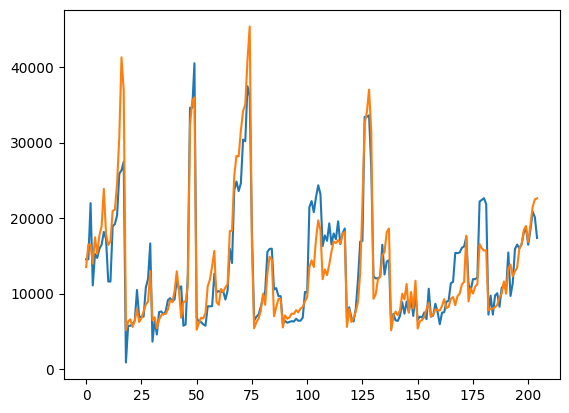

In [13]:
plt.plot(y_pred)
plt.plot(y_train)

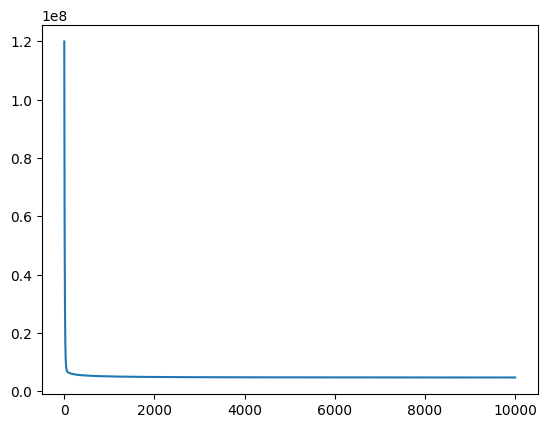

<Figure size 1500x1500 with 0 Axes>

In [14]:
plt.plot(cost_list)
fig = plt.figure(figsize=(15,15))
fig.show()

(13, 1)
80.50413884502656 %


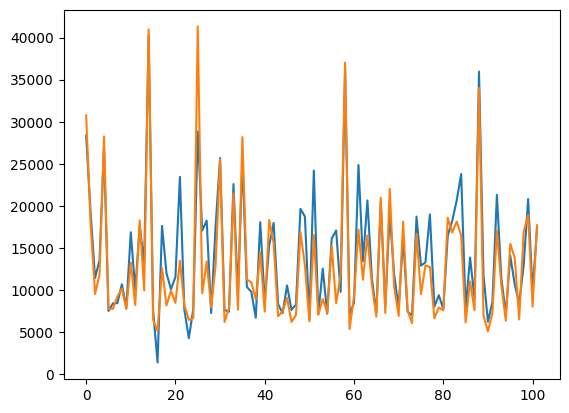

In [15]:
print(theta.shape)
print((r2_score(np.dot(x_test,theta),y_test)*100),'%')
plt.plot(np.dot(x_test,theta))
plt.plot(y_test)